#We are using Kaggle Dataset (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)
s#Spam.csv

Import libraries


In [1]:
import pandas as pd # for handling data tables
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns # for Visualization
from sklearn.model_selection import train_test_split # To split data
from sklearn.feature_extraction.text import CountVectorizer #To convert text to numbers
from sklearn.linear_model import LogisticRegression # For our first classifier
from sklearn.neighbors import KNeighborsClassifier # For KNN classifier
from sklearn.metrics import classification_report, confusion_matrix # For evaluation

Load the data

In [21]:
#Load the csv file
df = pd.read_csv("C:/Users/Aman Sinha/Downloads/spam.csv", encoding='latin-1') # was getting encoding error so : If you need to handle encoding errors, it's better to pre-process the file or explore different encoding options, such as encoding='latin-1', if you're unsure about the encoding. 


In [22]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
#Dropping the unnecessary columns
df = df[['v1','v2']] #only keep usefull ones: label(v1) and message (v2)
#renaming the columns for clarity
df.columns= ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
#Lets check for any mising values
print(df.isnull().sum())

label      0
message    0
dtype: int64


Data preprocessing

In [25]:
# Convert labels into Binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
# Convert text messages into numeric data using bag of words
vectorizer = CountVectorizer()  # Count how many times a word appears
X = vectorizer.fit_transform(df['message'])  # X is feature matrix

In [29]:
y= df['label'] # y is the target column (spam/ham)

#Split the data into training and testing parts (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 42)

Train Logistic Regression

In [30]:
#Create the model
log_model = LogisticRegression()
#Train it on the Training Data
log_model.fit(X_train,y_train)

LogisticRegression()

Evaluate Logistic Regression

In [31]:
#Make predictions on the test data
log_preds = log_model.predict(X_test)

In [32]:
#Print classification report on test data
print("Logistic Regression Report:")
print(classification_report(y_test, log_preds))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



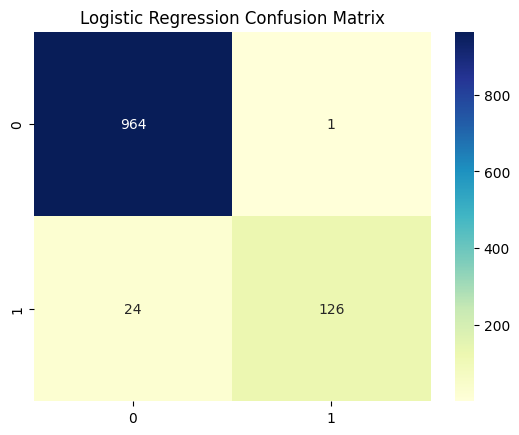

In [40]:
#Confusion matrix
sns.heatmap(confusion_matrix(y_test,log_preds), annot=True, fmt='d', cmap="YlGnBu")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Train the KNN Model 

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       965
           1       1.00      0.39      0.56       150

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.76      1115
weighted avg       0.93      0.92      0.90      1115



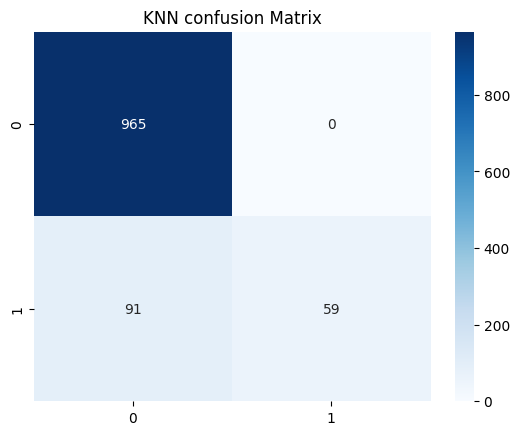

In [46]:
#Create the model
knn_model = KNeighborsClassifier(n_neighbors=5) # Use 5 neighbors
#Train the KNN model
knn_model.fit(X_train, y_train)
# Predict
knn_preds = knn_model.predict(X_test)
#Evaluate
print("KNN Classification Report:")
print(classification_report(y_test,knn_preds))
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test,knn_preds), annot=True, fmt="d", cmap="Blues")
plt.title("KNN confusion Matrix")
plt.show()

## Classification Report Breakdown
 Logistic Regression:
Metric	Class 0	Class 1
Precision	0.98	0.99
Recall	1.00	0.84
F1-score	0.99	0.91

Precision: → 99%

Recall:  → 84%

F1-score: Balance between precision and recall → 91%

 Balanced performance, class 1 ke liye bhi theek hai.

 KNN:
Metric	Class 0	Class 1
Precision	0.91	1.00
Recall	1.00	0.39
F1-score	0.95	0.56



Conclusion :
Metric	Logistic Regression	KNN
Accuracy	✅ 98%	✅ 92%
Class 1 Recall	✅ 84% (Good!)	❌ 39% (Too low!)
Overall Balance	✅ Yes	❌ Biased toward class 0
Real World Use	✅ Better for real tasks	❌ Might ignore small classes

Logistic Regression would be better.

Because catching actual '1s' (frauds or disease) is VERY important.

KNN is ignoring them — that's dangerous!